In [1]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency


In [ ]:
# Charger les données (même CSV que pour Q1)
df = pd.read_csv("../data/inventors_gender_birth.csv")

# Nettoyage : convertir la date et filtrer les valeurs manquantes
df['birth'] = pd.to_datetime(df['birth'], errors='coerce')
df = df.dropna(subset=['birth', 'genderLabel'])

# Créer une colonne 'siècle'
df['century'] = (df['birth'].dt.year // 100 + 1).astype(int).astype(str) + "e"

# Afficher un aperçu
print(df[['genderLabel', 'birth', 'century']].head())


  genderLabel                     birth century
0    masculin 1958-10-21 00:00:00+00:00     20e
1    masculin 1847-08-09 00:00:00+00:00     19e
2    masculin 1911-03-01 00:00:00+00:00     20e
3    masculin 1842-01-16 00:00:00+00:00     19e
4    masculin 1880-11-06 00:00:00+00:00     19e



Tableau de contingence :
genderLabel  femme trans  féminin  masculin  non-binarité
century                                                  
17e                    0        0        27             0
18e                    0       14       669             0
19e                    0      132      3365             0
20e                    2      191      3102             0
21e                    0       21        28             1

Statistique de Chi² : 334.85
Degrés de liberté : 12
p-value : 0.0000
Il existe une dépendance significative entre genre et siècle.


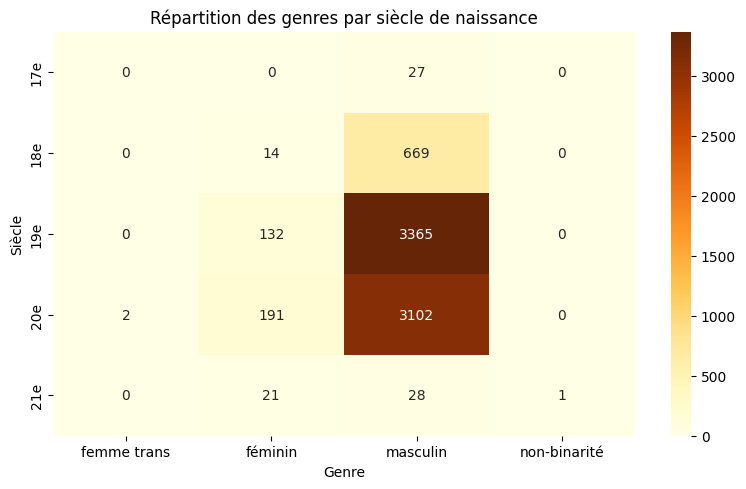

p-value : 2.20e-64


In [ ]:
# Créer le tableau de contingence : siècle x genre
contingency = pd.crosstab(df['century'], df['genderLabel'])

# Afficher le tableau
print("\nTableau de contingence :")
print(contingency)

# Test du Chi²
chi2, p, dof, expected = chi2_contingency(contingency)

print(f"\nStatistique de Chi² : {chi2:.2f}")
print(f"Degrés de liberté : {dof}")
print(f"p-value : {p:.4f}")

if p < 0.05:
    print("Il existe une dépendance significative entre genre et siècle.")
else:
    print("Aucune dépendance significative détectée.")

# Visualisation : heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(contingency, annot=True, fmt='d', cmap='YlOrBr')
plt.title("Répartition des genres par siècle de naissance")
plt.xlabel("Genre")
plt.ylabel("Siècle")
plt.tight_layout()
plt.show()
print(f"p-value : {p:.2e}") 

